In [1]:
import keras

In [2]:
import sklearn as sk

In [3]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

In [4]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

In [5]:
# load train, test, and validation datasets
train_files, train_targets = load_dataset(r'C:\Users\Maïmouna COULIBALY\Desktop\M2 Data ingeener & data science\projet deep learning\train')
valid_files, valid_targets = load_dataset(r'C:\Users\Maïmouna COULIBALY\Desktop\M2 Data ingeener & data science\projet deep learning\valid')
test_files, test_targets = load_dataset(r'C:\Users\Maïmouna COULIBALY\Desktop\M2 Data ingeener & data science\projet deep learning\test')

In [6]:
# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob(r'C:\Users\Maïmouna COULIBALY\Desktop\M2 Data ingeener & data science\projet deep learning\train/*/'))]

In [7]:
# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 120 total dog categories.
There are 61740 total dog images.

There are 20580 training dog images.
There are 20580 validation dog images.
There are 20580 test dog images.


In [8]:
import cv2
from PIL import ImageFile
import matplotlib.pyplot as plt                        
%matplotlib inline
import pandas as pd

 Data Exploration

In [9]:
# Function to display image
def display_image(x):
    '''
    function shows images in training set
    INPUT: integer between 0 and 6680
    OUTPUT: image
    '''
    img = cv2.imread(train_files[x])
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

In [10]:
display_image(9)

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [11]:
def create_train_dog_breeds():
    '''
    function create a dataframe from the training set
    OUTPUT: dataframe of dog breeds, with name and images.
    '''
    list_names = []
    num_files = []
    dog_db = pd.DataFrame()

    for  folder in sorted(glob(r'C:\Users\Maïmouna COULIBALY\Desktop\M2 Data ingeener & data science\projet deep learning\train/*/')):
        list_names.append(folder[20:-1])
        num_files.append(len(folder))    
    dog_db['dog_breed'] = list_names
    dog_db['qty_image'] = num_files
    return dog_db


In [12]:
df_train_dog_breeds = create_train_dog_breeds()

In [13]:
df_train_dog_breeds.head(5)

,dog_breed,qty_image
0,ULIBALY\Desktop\M2 Data ingeener & data scienc...,115
1,ULIBALY\Desktop\M2 Data ingeener & data scienc...,122
2,ULIBALY\Desktop\M2 Data ingeener & data scienc...,117
3,ULIBALY\Desktop\M2 Data ingeener & data scienc...,114
4,ULIBALY\Desktop\M2 Data ingeener & data scienc...,114


In [14]:
df_train_dog_breeds.describe()

,qty_image
count,120.000000
mean,119.258333
std,5.789727
min,109.000000
25%,114.000000
50%,119.000000
75%,123.000000
max,136.000000


In [15]:
df_train_dog_breeds

,dog_breed,qty_image
0,ULIBALY\Desktop\M2 Data ingeener & data scienc...,115
1,ULIBALY\Desktop\M2 Data ingeener & data scienc...,122
2,ULIBALY\Desktop\M2 Data ingeener & data scienc...,117
3,ULIBALY\Desktop\M2 Data ingeener & data scienc...,114
4,ULIBALY\Desktop\M2 Data ingeener & data scienc...,114
...,...,...
115,ULIBALY\Desktop\M2 Data ingeener & data scienc...,121
116,ULIBALY\Desktop\M2 Data ingeener & data scienc...,122
117,ULIBALY\Desktop\M2 Data ingeener & data scienc...,111
118,ULIBALY\Desktop\M2 Data ingeener & data scienc...,111


In [16]:
def plot_bar_df(x,x_label,y, y_label,title):
    '''
    function Plot a bar graph
    INPUT: x, y, title
    OUTPUT: Display a plot bar graph
    '''
    plt.figure(figsize=(15,4))
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.bar(x,y)
    plt.show()

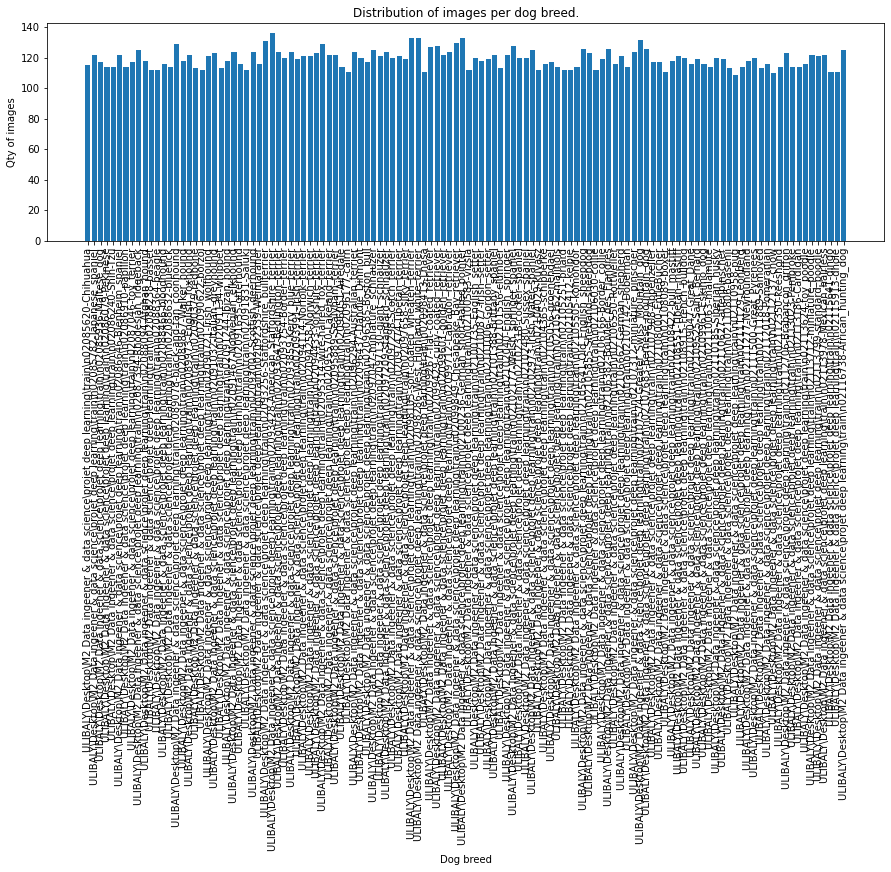

In [18]:
plot_bar_df(df_train_dog_breeds['dog_breed'], 'Dog breed', df_train_dog_breeds['qty_image'], 'Qty of images', 
            'Distribution of images per dog breed.' )

#  Detect Dogs

In [19]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

In [20]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

# Making Predictions with ResNet-50

In [21]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

Write a Dog Detector

In [22]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

# Create a CNN to Classify Dog Breeds (from Scratch)

In [23]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|███████████████████████████████████████████████████████████████████████████| 20580/20580 [02:09<00:00, 159.07it/s]


In [24]:
train_tensors.shape

(20580, 224, 224, 3)

In [25]:
valid_tensors.shape

(20580, 224, 224, 3)

In [26]:
test_tensors.shape

(20580, 224, 224, 3)

In [27]:
num_classes = 133

In [28]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

In [29]:
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.15))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(num_classes, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0

In [30]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
from keras.callbacks import ModelCheckpoint  



epochs = 5

In [32]:


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=25, callbacks=[checkpointer], verbose=1)

Epoch 1/5
824/824 [==============================] - ETA: 0s - loss: 4.7935 - accuracy: 0.0112
Epoch 00001: val_loss improved from inf to 4.75147, saving model to saved_models\weights.best.from_scratch.hdf5
824/824 [==============================] - 501s 608ms/step - loss: 4.7935 - accuracy: 0.0112 - val_loss: 4.7515 - val_accuracy: 0.0162
Epoch 2/5
824/824 [==============================] - ETA: 0s - loss: 4.6949 - accuracy: 0.0206
Epoch 00002: val_loss improved from 4.75147 to 4.62515, saving model to saved_models\weights.best.from_scratch.hdf5
824/824 [==============================] - 518s 629ms/step - loss: 4.6949 - accuracy: 0.0206 - val_loss: 4.6251 - val_accuracy: 0.0276
Epoch 3/5
824/824 [==============================] - ETA: 0s - loss: 4.6093 - accuracy: 0.0280
Epoch 00003: val_loss improved from 4.62515 to 4.57505, saving model to saved_models\weights.best.from_scratch.hdf5
824/824 [==============================] - 520s 631ms/step - loss: 4.6093 - accuracy: 0.0280 - val_lo

In [ ]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

In [ ]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)